<div class="alert alert-success">

<b>Tugas Fuzzy</b>:

 <ul>
  <li>Nama  : Xosya Salassa</li>
  <li>NIM   : 09011281722033</li>
  <li>Kelas : SK 5 A</li>
</ul>
</div>

<h1 align = "center"> <font color='green'> IMPLEMENTASI METODE FUZZY MAMDANI DALAM MEMPREDIKSI TINGKAT KEBISINGAN LALU LINTAS </h1> </font>

"Logika Fuzzy adalah suatu cara yang tepat untuk memetakan suatu raung input ke dalam suatu ruang output"(Kusumadewi & Purnomo 2003, h.1). Alasan menggunakan logika fuzzy, antara lain ; Konsep Logika fuzzy lebih mudah dipahami dan logika fuzzy apabila terdapat data yang tidak tepat memiliki toleransi. secara umum, sistem logika fuzzy memiliki 4 elemen yaitu : 
* basis aturan yang berisi aturan - aturan yang bersumber dari pakar
* Suatu mekanisme pengambilan keputusan dimana pakar mengambil keputusan dengan menerapkan pengetahuan yang dimiliki
* proses fuzzifikasi (fuzzification) yang merubah besaran tegas (crisp) ke dalam besaran fuzzy;
* proses deffuzzifikasi (defuzzification), merupakan kebalikan dari proses fuzzifikasi yaitu merubah besaran fuzzy hasil dari inference engine, menjadi besaran tegas(crisp)

Pada kali ini akan ditampilkan metode Fuzzy untuk menghitung tingkat Kebisingan yang ada di jalanan 
<div class="alert alert-warning">
 <ul>
Dalam memprediksi tingkat kebisingan lalu lintas di jalan raya. Di mana dalam konsep Fuzzy Mamdani diperlukan kriteria - kriteria dan nilai bobot setiap kriteria untuk melakukan perhitungan sehingga akan didapat hasil prediksi seperti yang diharapkan
    
</div>

Kriteria yang ditetapkan dalam studi kasus ini adalah nilai Lebar jalan, banyaknya kendaraan, faktor koreksi, yang dijadikan input dalam sistem fuzzy yang akan dibuat. Dan kebisingan merupakan output dari sistem ini.

<div class="alert alert-warning">
<b>Antecedents (Inputs)</b>: <br><br>
 <ul>
  <li>Lebar Jalan</li>Fuzz Set : Sempit, Sedang, Lebar
  <li>Banyak Kendaraan</li>Fuzz Set : Sedikit, Sedang, Banyak
  <li>Faktor Koreksi</li>Fuzz Set : Rendah, Sedang, Tinggi
<br><br>
<b>Consequents (Outputs)</b>: <br><br>
 <ul>
  <li>Tingkat Kebisingan</li>Fuzz Set : Rendah, Sedang, Tinggi
</ul>
    
</div>

### SHORTCUT
* [Import Library](#import)
* [Linguistik Input](#input)
* [Linguistik Output](#output)
* [Rule Base](#rules)
* [Inferensi](#inferensi)
* [Defuzzifikasi](#defuz)
* [Perhitungan Manual](#manual)

# **1. Import Library Fuzzy** <a class="anchor" id="import"></a>

Untuk pengimportan Library ada 3 Modul yang saya gunakan yaitu 
<div class="alert alert-warning">
  <li>Skfuzzy yang berisi modul untuk memproses logika fuzzynya </li>
  <li>Numpy yang berfungi untuk menampung data yang akan di proses</li>
  <li>matplotlib.pyplot yang berfungsi untuk menggambarkan logika fuzzynya nanti, yang mana nantinya akan menghasilkan gambar publikasi bermut di dalam berbagi format hardcopy dan lingkungan interaktif sepanjang platform</li>
</ul>
</div>

In [1]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# 2. Menentukan Membership Function dan NIlai Linguistik untuk INPUT <a class="anchor" id="input"></a>

In [2]:
jalan = ctrl.Antecedent(np.arange(3, 12, 0.05), 'jalan')
kendaraan = ctrl.Antecedent(np.arange(2, 60, 0.1), 'kendaraan')
koreksi = ctrl.Antecedent(np.arange(0.4, 1.3, 0.0005), 'koreksi')
kebisingan = ctrl.Consequent(np.arange(60, 100, 0.05), 'kebisingan')

Sistem ini menggunakan fungsi **Triangle (Segitiga)**, dimana a,b,dan c merupakan batas - batas dari himpunan fuzzy 
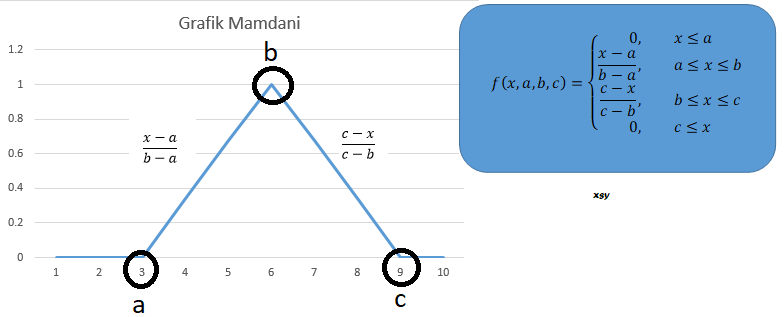
<div class="alert alert-success">
**<font color = blue>Untuk mencari 
    nilai pada sumbu Y (nilai derajat keanggotaan), diharuskan mengetahui persamaan garis yang melalui titik potong himpunan Sedang dan Banyak. Sebuah fungsi keanggotaan segitiga memiliki nilai fungsi yang berbeda - beda, tergantung pada nilai x yang ada </font>**
</ul>
</div>

### a. input Lebar Jalan
Lebar jalan, terdiri atas 3 nilai linguistik, yaitu sempit, sedang, dan tinggi. maka fungsi keanggotaan dirumuskan sebagai berikut: 
\begin{equation}
  jalan['sempit'] = \mu JalanSempit(x)=\begin{cases}
    1, & \text{$x\leq3$}\\
    (7.5 - x)/(7.5 - 3) , & \text{$3 < x < 7.5$}\\
    0, & \text{$x\geq 7.5$}
  \end{cases}
  \\
  jalan['sedang'] = \mu JalanSedang(x)=\begin{cases}
    0, & \text{$x\leq3$}\\
    (x - 3)/(7.5 - 3) , & \text{$3 < x < 7.5$}\\
    (12 - x)/(7.5 - 3) , & \text{$7.5 \leq x \leq 12$}\\
  \end{cases}
  \\
  jalan['lebar'] = \mu JalanLebar(x)=\begin{cases}
    0, & \text{$x\leq7.5$}\\
    (x - 7.5)/(12 - 7) , & \text{$7.5 < x < 12$}\\
    1, & \text{$x\geq 12$}
  \end{cases}
 \end{equation}

In [3]:
jalan['sempit'] = fuzz.trimf(jalan.universe, [3, 3, 7.5])
jalan['sedang'] = fuzz.trimf(jalan.universe, [3, 7.5, 12])
jalan['lebar'] = fuzz.trimf(jalan.universe, [7.5, 12, 12])

C:\Users\FRLB\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


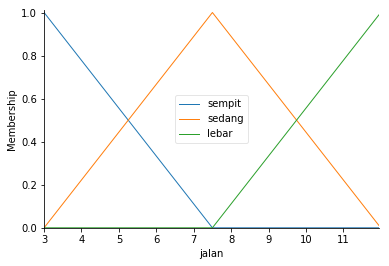

In [4]:
jalan.view()

### b. input Jumlah Kendaraan
Jumlah kendaraan, terdiri dari 3 nilai linguistik , yaitu sedikit, sedang, dan tinggi. maka fungsi keanggotaan dirumuskan sebagai berikut : 
\begin{equation}
  kendaraan['sedikit'] = \mu KendaraanSedikit(x)=\begin{cases}
    1, & \text{$x\leq2$}\\
    (20 - x)/(20 - 2) , & \text{$2 < x < 20$}\\
    0, & \text{$x\geq 20$}
  \end{cases}
  \\
  kendaraan['sedang'] = \mu KendaraanSedang(x)=\begin{cases}
    0, & \text{$x\leq20$}\\
    (x - 20)/(30 - 20) , & \text{$20 < x < 30$}\\
    (40 - x)/(60 - 40) , & \text{$30 \leq x \leq 40$}\\
  \end{cases}
  \\
  kendaraan['banyak'] = \mu KendaraanBanyak(x)=\begin{cases}
    0, & \text{$x\leq40$}\\
    (x - 40)/(60-40) , & \text{$40 < x < 60$}\\
    1, & \text{$x\geq 60$}
  \end{cases}
 \end{equation}

In [5]:
kendaraan['sedikit'] = fuzz.trimf(kendaraan.universe, [2, 2, 20])
kendaraan['sedang'] = fuzz.trimf(kendaraan.universe, [20, 30, 40])
kendaraan['banyak'] = fuzz.trimf(kendaraan.universe, [40, 60, 60])

C:\Users\FRLB\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


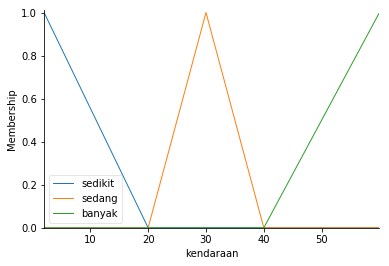

In [6]:
kendaraan.view()

### c. input Tingkat Koreksi
Koreksi, terdiri dari 3 nilai linguistik yaitu rendah, sedang, dan tinggi . maka fungsi keanggotaannya dapat dirumuskan sebagai berikut : 
\begin{equation}
  Koreksi['rendah'] = \mu KoreksiRendah(x)=\begin{cases}
    1, & \text{$x\leq0.4$}\\
    (0.85 - x)/(0.85 - 0.4) , & \text{$0.4 < x < 0.85$}\\
    0, & \text{$x\geq 0.85$}
  \end{cases}
  \\
  Koreksi['sedang'] = \mu KoreksiSedang(x)=\begin{cases}
    0, & \text{$x\leq0.4$}\\
    (x - 0.4)/(0.85 - 0.4) , & \text{$0.4 < x < 0.85$}\\
    (1.3 - x)/(0.85 - 0.4) , & \text{$0.85 \leq x \leq 1.3$}\\
  \end{cases}
  \\
  Koreksi['tinggi'] = \mu KoreksiTinggi(x)=\begin{cases}
    0, & \text{$x\leq0.85$}\\
    (x - 0.85)/(1.3 - 0.85) , & \text{$0.85 < x < 1.3$}\\
    1, & \text{$x\geq 1.3$}
  \end{cases}
 \end{equation}

In [7]:
koreksi['rendah'] = fuzz.trimf(koreksi.universe, [0.4, 0.4, 0.85])
koreksi['sedang'] = fuzz.trimf(koreksi.universe, [0.4, 0.85, 1.3])
koreksi['tinggi'] = fuzz.trimf(koreksi.universe, [0.85, 1.3, 1.3])

C:\Users\FRLB\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


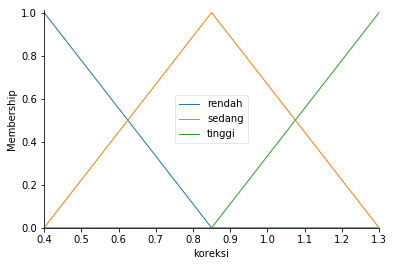

In [8]:
koreksi.view()

# 3. Menentukan Membership Function dan Nilai Linguistik untuk Output <a class="anchor" id="output"></a>

Kebisingan, terdiri dari 3 nilai linguistik, yaitu kebisingan rendah, sedang, dan tinggi. maka fungsi keanggotaan dirumuskan sebagai berikut : 
\begin{equation}
  Koreksi['rendah'] = \mu KoreksiRendah(x)=\begin{cases}
    1, & \text{$x\leq60$}\\
    (80 - x)/(80 - 60) , & \text{$60 < x < 80$}\\
    0, & \text{$x\geq 80$}
  \end{cases}
  \\
  Koreksi['sedang'] = \mu KoreksiSedang(x)=\begin{cases}
    0, & \text{$x\leq60$}\\
    (x - 60)/(80 - 60) , & \text{$60 < x < 80$}\\
    (100 - x)/(100 - 80) , & \text{$80 \leq x \leq 100$}\\
  \end{cases}
  \\
  Koreksi['tinggi'] = \mu KoreksiTinggi(x)=\begin{cases}
    0, & \text{$x\leq80$}\\
    (x - 80)/(100 - 80) , & \text{$80 < x < 100$}\\
    1, & \text{$x\geq 100$}
  \end{cases}
 \end{equation}

In [9]:
#custom Output Kebisingan 
kebisingan['rendah'] = fuzz.trimf(kebisingan.universe, [60, 60, 80])
kebisingan['sedang'] = fuzz.trimf(kebisingan.universe, [60, 80, 100])
kebisingan['tinggi'] = fuzz.trimf(kebisingan.universe, [80, 100, 100])

C:\Users\FRLB\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


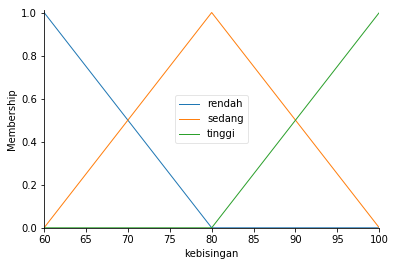

In [10]:
kebisingan.view()

# 4. Rule Base <a class="anchor" id="rules"></a>

|Rule|Kebisingan|Jalan|Koreksi|Kendaraan|
|----|----------|-----|-------|---------|
|Rule1|Rendah|Sempit|Tinggi|Sedikit|
|Rule2|Rendah|Sedang|Tinggi|Sedikit|
|Rule3|Rendah|Lebar|Tinggi|Sedikit|
|Rule4|Rendah|Sempit|Sedang|Sedikit|
|Rule5|Rendah|Sedang|Sedang|Sedikit|
|Rule6|Rendah|Lebar|Sedang|Sedang|
|Rule7|Rendah|Sempit|Rendah|Sedikit|
|Rule8|Rendah|Sedang|Rendah|Sedang|
|Rule9|Rendah|Lebar|Rendah|Sedang|
|Rule10|Sedang|Sempit|Tinggi|Sedikit|
|Rule11|Sedang|Sedang|Tinggi|Sedikit|
|Rule12|Sedang|Lebar|Tinggi|Sedang|
|Rule13|Sedang|Sempit|Sedang|Sedikit|
|Rule14|Sedang|Sedang|Sedang|Sedang|
|Rule15|Sedang|Lebar|Sedang|Banyak|
|Rule16|Sedang|Sempit|Rendah|Sedang|
|Rule17|Sedang|Sedang|Rendah|Banyak|
|Rule18|Sedang|Lebar|Rendah|Banyak|
|Rule19|Tinggi|Sempit|Tinggi|Sedang|
|Rule20|Tinggi|Sedang|Tinggi|Sedang|
|Rule21|Tinggi|Lebar|Tinggi|Banyak|
|Rule22|Tinggi|Sempit|Sedang|Sedang|
|Rule23|Tinggi|Sedang|Sedang|Banyak|
|Rule24|Tinggi|Lebar|Sedang|Banyak|
|Rule25|Tinggi|Sempit|Rendah|Banyak|
|Rule26|Tinggi|Sedang|Rendah|Banyak|
|Rule27|Tinggi|Lebar|Rendah|Banyak|

In [11]:
#Fuzzy Rules
rule1 = ctrl.Rule(jalan['sempit'] & koreksi['tinggi'] & kendaraan['sedikit'], kebisingan['rendah'])
rule2 = ctrl.Rule(jalan['sedang'] & koreksi['tinggi'] & kendaraan['sedikit'], kebisingan['rendah'])
rule3 = ctrl.Rule(jalan['lebar'] & koreksi['tinggi'] & kendaraan['sedikit'], kebisingan['rendah'])
rule4 = ctrl.Rule(jalan['sempit'] & koreksi['sedang'] & kendaraan['sedikit'], kebisingan['rendah'])
rule5 = ctrl.Rule(jalan['sedang'] & koreksi['sedang'] & kendaraan['sedikit'], kebisingan['rendah'])
rule6 = ctrl.Rule(jalan['lebar'] & koreksi['sedang'] & kendaraan['sedang'], kebisingan['rendah'])
rule7 = ctrl.Rule(jalan['sempit'] & koreksi['rendah'] & kendaraan['sedikit'], kebisingan['rendah'])
rule8 = ctrl.Rule(jalan['sedang'] & koreksi['rendah'] & kendaraan['sedang'], kebisingan['rendah'])
rule9 = ctrl.Rule(jalan['lebar'] & koreksi['rendah'] & kendaraan['sedang'], kebisingan['rendah'])
rule10 = ctrl.Rule(jalan['sempit'] & koreksi['tinggi'] & kendaraan['sedikit'], kebisingan['sedang'])
rule11 = ctrl.Rule(jalan['sedang'] & koreksi['tinggi'] & kendaraan['sedikit'], kebisingan['sedang'])
rule12 = ctrl.Rule(jalan['lebar'] & koreksi['tinggi'] & kendaraan['sedang'], kebisingan['sedang'])
rule13 = ctrl.Rule(jalan['sempit'] & koreksi['sedang'] & kendaraan['sedikit'], kebisingan['sedang'])
rule14 = ctrl.Rule(jalan['sedang'] & koreksi['sedang'] & kendaraan['sedang'], kebisingan['sedang'])
rule15 = ctrl.Rule(jalan['lebar'] & koreksi['sedang'] & kendaraan['banyak'], kebisingan['sedang'])
rule16 = ctrl.Rule(jalan['sempit'] & koreksi['rendah'] & kendaraan['sedang'], kebisingan['sedang'])
rule17 = ctrl.Rule(jalan['sedang'] & koreksi['rendah'] & kendaraan['banyak'], kebisingan['sedang'])
rule18 = ctrl.Rule(jalan['lebar'] & koreksi['rendah'] & kendaraan['banyak'], kebisingan['sedang']) 
rule19 = ctrl.Rule(jalan['sempit'] & koreksi['tinggi'] & kendaraan['sedang'], kebisingan['tinggi'])
rule20 = ctrl.Rule(jalan['sedang'] & koreksi['tinggi'] & kendaraan['sedang'], kebisingan['tinggi']) 
rule21 = ctrl.Rule(jalan['lebar'] & koreksi['tinggi'] & kendaraan['banyak'], kebisingan['tinggi'])
rule22 = ctrl.Rule(jalan['sempit'] & koreksi['sedang'] & kendaraan['sedang'], kebisingan['tinggi'])
rule23 = ctrl.Rule(jalan['sedang'] & koreksi['sedang'] & kendaraan['banyak'], kebisingan['tinggi'])
rule24 = ctrl.Rule(jalan['lebar'] & koreksi['sedang'] & kendaraan['banyak'], kebisingan['tinggi'])
rule25 = ctrl.Rule(jalan['sempit'] & koreksi['rendah'] & kendaraan['banyak'], kebisingan['tinggi'])
rule26 = ctrl.Rule(jalan['sedang'] & koreksi['sedang'] & kendaraan['banyak'], kebisingan['tinggi'])
rule27 = ctrl.Rule(jalan['lebar'] & koreksi['rendah'] & kendaraan['banyak'], kebisingan['tinggi'])



C:\Users\FRLB\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25fb34b7630>)

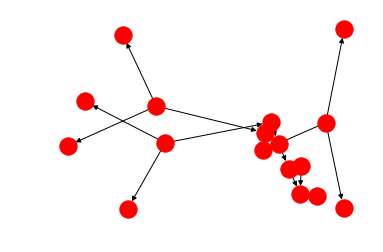

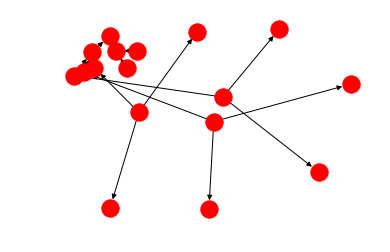

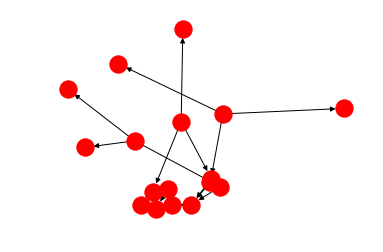

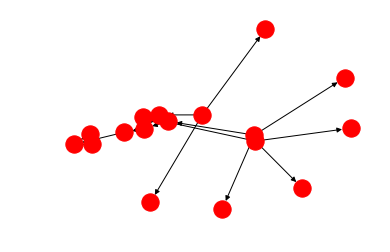

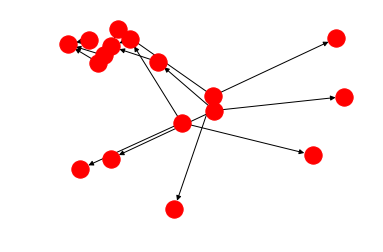

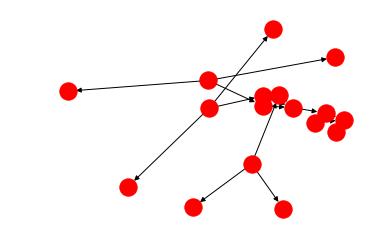

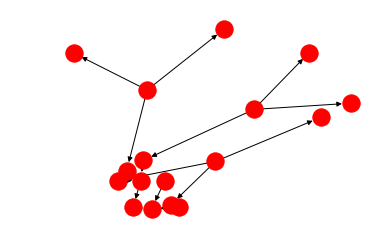

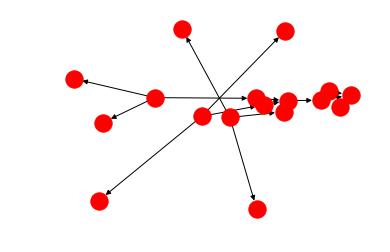

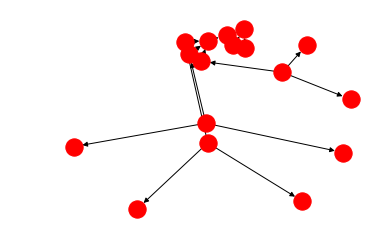

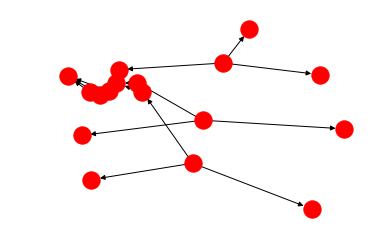

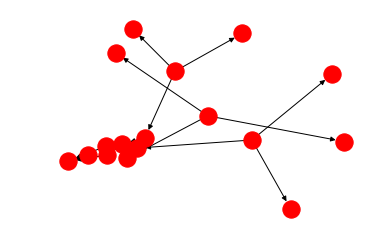

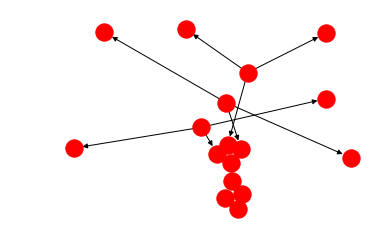

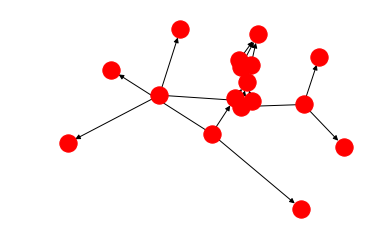

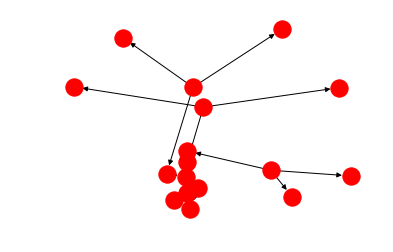

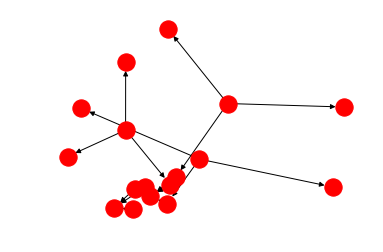

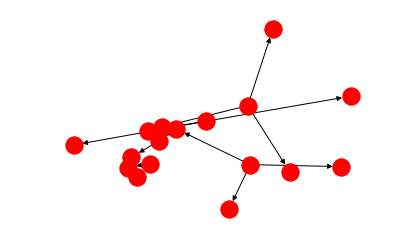

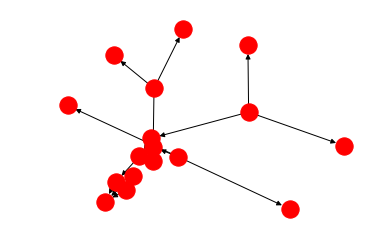

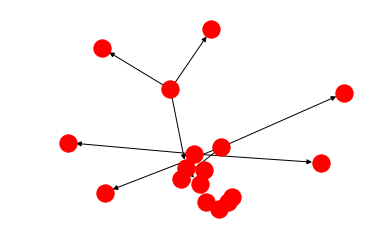

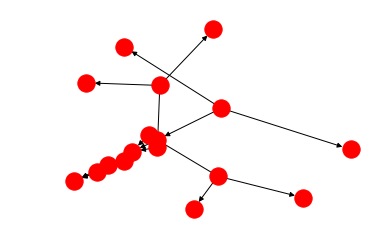

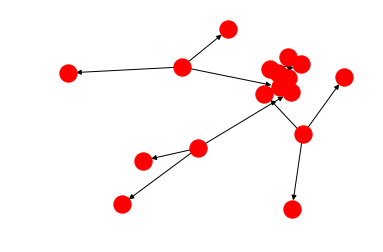

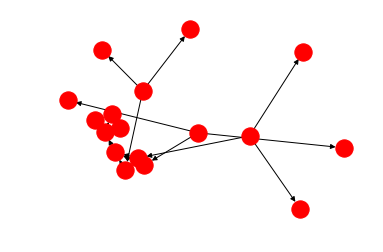

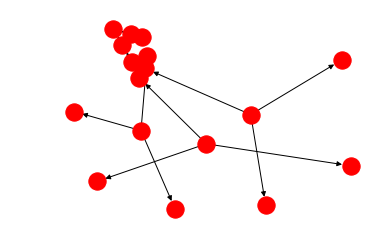

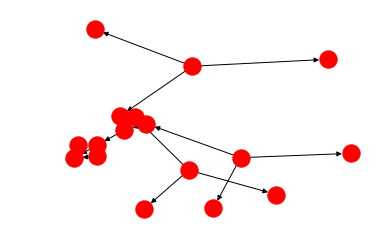

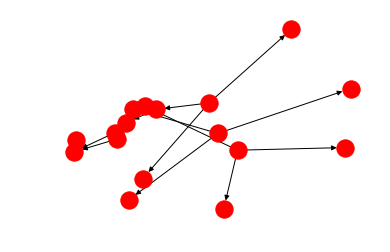

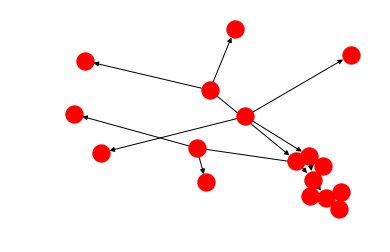

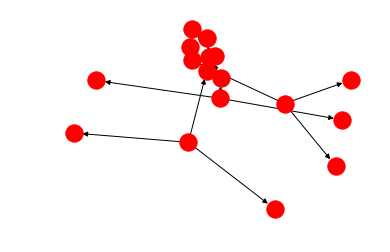

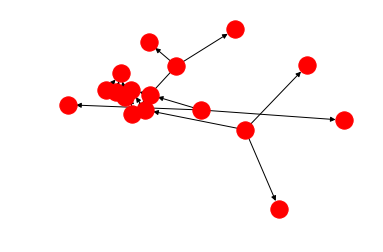

In [12]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()
rule11.view()
rule12.view()
rule13.view()
rule14.view()
rule15.view()
rule16.view()
rule17.view()
rule18.view()
rule19.view()
rule20.view()
rule21.view()
rule22.view()
rule23.view()
rule24.view()
rule25.view()
rule26.view()
rule27.view()

Rule view disini berfungsi sebagai penampil dari bagaimana arah - arah rule itu bergerak

# Inferensi <a class="anchor" id="inferensi"></a>
Sistem Inferensi Fuzzy merupakan suatu kerangka komputasi yang didasarkan pada teori himpunan fuzzy, aturan fuzzy berbentuk IF-THEN dan penalaran fuzzy secara garis besar. Diagram blok proses inferensi fuzzy terlihat pada gambar di bawah ini
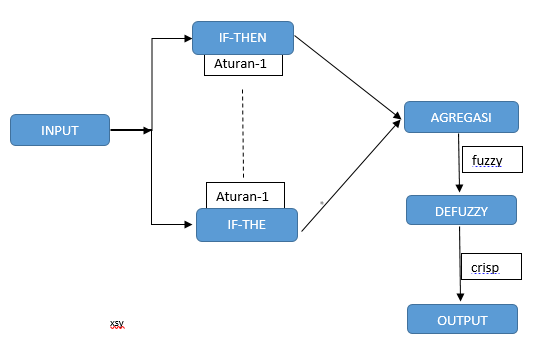


In [13]:
kebisingan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])

Pada metode **Mamdani**, dilakukan penggabungan semua rule base yang aktif dengan fungsi **MAX** yang ada pada setiap output pada kondisi yang sama

In [14]:
tingkat_kebisingan = ctrl.ControlSystemSimulation(kebisingan_ctrl)

Pada syntax di atas terdapat 3 code yakni : 
1. **ControlSystem([list_rule])**
        Fungsi ini berfungsi secara otomatis untuk mengimplikasi rule yang ada dan menggabungkan semua nilai rule yang terdapat pada rulebase
2. **ControlSystemSimulation(ControlSystem)**
        Fungsi ini berfungsi sebagai mensimulasikan sistem kontrol yang ada ada sesuai dengan gabungan rule yang sudah dibuat oleh ControlSystem 
3. **input['Variabel_Input']**
        Fungsi input yang ada pada syntax ini berguna untuk memberikan nilai kepada variable variable input utuk disimulasikan ke dalam ControlSystem

In [15]:
tingkat_kebisingan.input['jalan'] = 7.6
tingkat_kebisingan.input['kendaraan'] = 37
tingkat_kebisingan.input['koreksi'] = 0.958

# Deffuzifikasi <a class="anchor" id="defuz"></a>
<div class="alert alert-success">

<b>Tahap defuzzifikasi adalah tahap pertitungan crips output. Input dari tahap ini adalah himpunan fuzzy yang sudah dibuat di bagian atas yang mana dapat diperoleh dari komposisi aturan - aturan fuzzy, sedangkan outputnya adalah suatu bilangan pada domain himpunan fuzzy tersebut. Proses defuzzifikasi dengan fuzzy mamdani pada penelitian ini menggunakan metode centroid untuk semesta diskret </b>:

</ul>
</div>

In [16]:
tingkat_kebisingan.compute()

80.95279025937096


C:\Users\FRLB\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


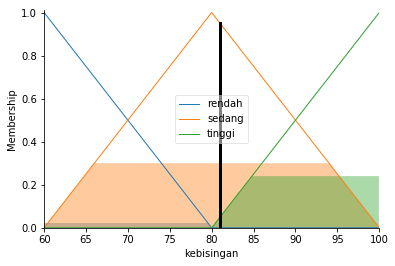

In [17]:
print (tingkat_kebisingan.output['kebisingan'])
kebisingan.view(sim=tingkat_kebisingan)

# Perhitungan Manual <a class="anchor" id="manual"></a>

# Soal 

Berapakah nilai tingkat kebisingan dari beberapa faktor berikut ini 

|Lebar Jalan|Jumlah Kendaraan|Faktor Koreksi|
|-----------|----------------|--------------|
|7.6|37|0.958|

### 1. Fuzzifikasi 

**Lebar Jalan : 7.6**
- Jalan Sedang [7.6] $$Jalan Sedang =\frac{12-7.5}{5}=0.88$$
  <font color=green>**Jalan Sedang [7.6] = 0.88**</font>
- Jalan Lebar [7.6]  $$Jalan Lebar =\frac{7.6-7.5}{5}=0.02$$
  <font color=green>**Jalan Lebar [7.6] = 0.02**</font>
  
**Banyak Kendaraan : 37**
- Kendaraan Sedang [7.6] $$Kendaraan Sedang = \frac{40-37}{10}=0.3$$
  <font color=green>**Kendaraan Sedang [37] = 0.3**</font>

**Faktor Koreksi : 0.958**
- Koreksi Sedang [0.958] $$Koreksi Sedang = \frac{1.3 - 0.958}{0.45}=0.76$$
  <font color=green>**Koreksi Sedang [0.958] = 0.76**</font>
- Koreksi Tinggi [0.958] $$Koreksi Tinggi =\frac{0.958-0.85}{0.45}=0.24$$
  <font color=green>**Koreksi Tinggi [0.958] = 0.24**</font>

### 2. Evaluasi Rule
- <font color=green>**Jalan Sedang [7.6] & Kendaraan Sedang [37]  & Koreksi Sedang [37] = Sedang **</font>

    **min(0.88 & 0.3 & 0.76) = <font color = red>0.3</font>**
- <font color=green>**Jalan Sedang [7.6] & Kendaraan Sedang [37]  & Koreksi Tinggi [37] = Tinggi **</font>

    **min(0.88 & 0.3 & 0.24) = <font color = red>0.24</font>**
- <font color=green>**Jalan Lebar [7.6] & Kendaraan Sedang [37]  & Koreksi Sedang [37] = Rendah **</font>

    **min(0.02 & 0.3 & 0.76) = <font color = red>0.02</font>**
- <font color=green>**Jalan Lebar[7.6] & Kendaraan Sedang [37]  & Koreksi Tinggi [37] = Sedang **</font>

    **min(0.88 & 0.3 & 0.24) = <font color = red>0.02</font>**

### 3. Inferensi

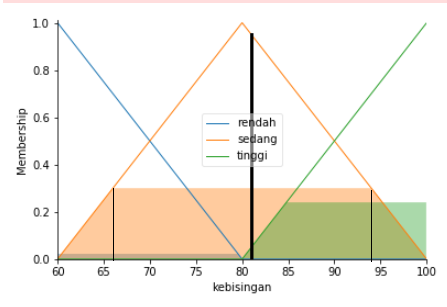

<div class="alert alert-warning">
<b>Penjelasan</b>: <br>
 <ul>
  <li>Luas Daerah 1</li>Berbentuk segitiga yang mana alasnya dimulai dari **<font color = red>60 hingga 66</font>** dan tingginya yaitu **<font color = red>0.3</font>**
  <li>Luas Daerah 2</li>Berbentuk Persegi Panjang yang mana panjangnya dimulai dari **<font color = red>66 hingga 94</font>** dan lebarnya yaitu **<font color = red>0.3</font>**
  <li>Luas Daerah 3</li>Berbentuk Persegi Panjang yang mana panjangnya dimulai dari **<font color = red>94 hingga 100</font>** dan lebarnya yaitu **<font color = red>0.24</font>**
<br><br>
    
</div>

### 4. Deffuzifikasi

**Langkah - Langkah**
###### 1. Menghitung Titik Tengah Daerah
<div class="alert alert-warning">
<b>Untuk memudahkan penulisan, titik tengah dari luas daerah dilambangkan dengan Xn</b>: <br>
 <ul>
  <li>**X1 = Segitiga**</li>
  <li>**X2 = Persegi Panjang**</li>
  <li>**X3 = Persegi Panjang**</li>
    
</div>

- **X1** = $$ X1 =  x + \frac{2}{3}(y-x)$$
$$ X1 =  60 + \frac{2}{3}(66-60)$$
$$ X1 =  60 + \frac{2}{3}(6)$$
$$ X1 =  64$$
- **X2** = $$ X2 = \frac{(x+y)}{2}$$
$$ X2 = \frac{(66+94)}{2}$$
$$ X2 =  \frac{160}{2}$$
$$ X2 =  80$$
- **X3** = $$ X3 = \frac{(x+y)}{2}$$
$$ X3 = \frac{(94+100)}{2}$$
$$ X3 =  \frac{194}{2}$$
$$ X3 =  97$$

### 2. Menghitung Luas Daerah
<div class="alert alert-warning">
<b>Untuk memudahkan penulisan, Luas Daerah dilambangkan dengan An</b>: <br>
 <ul>
  <li>**A1 = Segitiga**</li>
  <li>**A2 = Persegi Panjang**</li>
  <li>**A3 = Persegi Panjang**</li>
    
</div>
- **A1** = $$ A1 = \frac{(alas*tinggi)}{2}$$
$$ A1 = \frac{(6*0.3)}{2}$$
$$ A1 =  \frac{1.8}{2}$$
$$ A1 =  0.9$$
- **A2** = $$ A2 = (panjang * lebar)$$
$$ A2 = (28*0.3)$$
$$ A2 = 8.9$$
- **A3** = $$ A3 = (panjang * lebar)$$
$$ A3 = (6*0.24)$$
$$ A3 = 1.44$$


### 3. Menghitung Nilai Deffuzifikasi 
<div class="alert alert-warning">
<b>Setelah mendapatkan variabel yang dibutuhkan, yakni : </b>: <br>

</div>

  ||1|2|3|
  |-|-|-|-|
  |X|64|80|97|
  |A|0.9|8.4|1.44|
  
<div class="alert alert-warning">
<b>Maka langkah selanjutnya adalah menghitung nilai Deffuzifikasinya </b>: <br>

</div>
**Dengan Rumus**

- Hasil = 
$$ Hasil = \frac{\sum_{i}^{n}XiAi}{\sum_{i}^{n}Ai} $$
$$Hasil = \frac{(X1 * A1) + (X2 * A2 + (X3 * A3)}{A1+A2+A3}$$
$$Hasil = \frac{(64 * 0.9) + (80 * 8.4) + (97 * 1.44)}{(0.9+8.4+1.44}$$
$$Hasil = \frac{(57.6) + (678) + (139.68)}{(0.9+8.4+1.44)}$$
$$Hasil = \frac{(869.28)}{(10.74)}$$
$$Hasil = 80.93855$$

### Analisa
1. Setelah semua input output dan fuzzifikasi di deklarasikan dan dilakukan pengujian di deffuzifikasi maka tingkat hasil kebisingan dari 

|Lebar Jalan|Jumlah Kendaraan|Faktor Koreksi|
|-----------|----------------|--------------|
|7.6|37|0.958|

   adalah : **<font color = red>80.95279025937096</font>**

   Sedangkan jika dilakukan dengan penghitungan manual hasil yang didapat dari 

|Lebar Jalan|Jumlah Kendaraan|Faktor Koreksi|
|-----------|----------------|--------------|
|7.6|37|0.958|

   adalah : **<font color = red>80.93855</font>**

2. Oleh Sebab itu adanya perbedaan yang dihasilkan dari Deffuzifikasi Python dan Perhitungan Manual yang sudah dilakukan sebesar :  **<font color = red>0.01424025937096‬ </font>**atau sebesar **<font color = red>0.01759081969%</font>**
3. hal ini disebakan oleh pembagian yang dari agregasi yang kurang tepat ketika mengambil berapa alas pada segitiga ataupun berapa panjang dari persegi panjang 

#####  Saran
1. Adanya pengujian dengan metode lain untuk melihat tingkat kesalahan dalam memprediksi tingkat kebisingan lalu lintas 
2. Adanya penambahan variabel inputan yang relevan dengan menentukan tingkat kebisingan lalu lintas agar hasil yang di prediksi mendapatkan hasil yang akurat 

# Referensi 
* [Paper](https://ojs.amikom.ac.id/index.php/semnasteknomedia/article/view/744/712)
* [Membuat Judul Berwarna](http://www.jendelastatistik.com/2017/05/belajar-dasar-python-dengan-tools.html)
* [Rumus Latex dan Codingan](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)
* [Import Image](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook)
* [Contoh Struktur Codingan](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html)
* [Membuat Tabel](https://sourceforge.net/p/jupiter/wiki/markdown_syntax/#md_ex_tables)
* [Cara Membuat Referensi](https://sourceforge.net/p/jupiter/wiki/markdown_syntax/#md_ex_tables)
* [Unorder List](https://www.markdownguide.org/basic-syntax/)